In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [3]:
track_info = '../dummy_data/user_features/sarahlc888.top.csv'
features_df = pd.read_csv(track_info)
features_df.head()

,artist,album,track_name,track_id,artist_genre,album_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,glass beach,the first glass beach album,(forever?????????),517sX57TlnUy19bkOBfnZS,modern power pop,NaN,0.303,0.070,1,-22.367,1,0.0347,0.984,0.882000,0.1080,0.0383,160.118,108000,3
1,Rayland Baxter,Wide Awake,Without Me,58fhd4lGAudPcnfY9oenp1,"deep new americana,indie folk,new americana,st...",NaN,0.470,0.351,7,-9.385,1,0.0340,0.757,0.000001,0.5560,0.3920,152.013,344573,4
2,Tora,Can't Buy the Mood,Similar,2HMAB8zla6LG6bpjycfsCT,"alternative r&b,indie soul,vapor soul",NaN,0.410,0.372,1,-8.938,1,0.0487,0.926,0.000035,0.1140,0.2000,147.932,168376,4
3,dhruv,moonlight,moonlight,4d83gRvk3DHU5cWBbyOlSk,nyc pop,NaN,0.736,0.500,11,-11.229,0,0.1710,0.639,0.001310,0.1040,0.5650,92.031,159130,4
4,Soft Glas,Stunned,Basil,6MtNaFEE9samNAE9OfX2bo,bedroom pop,NaN,0.438,0.217,9,-15.780,0,0.0315,0.536,0.826000,0.0981,0.0980,108.065,152500,4


In [4]:
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

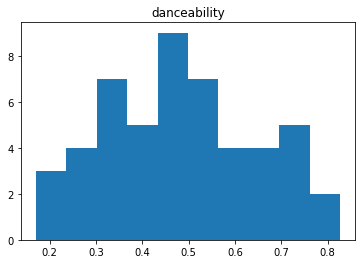

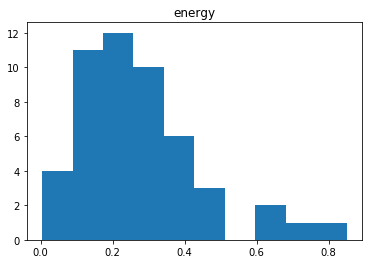

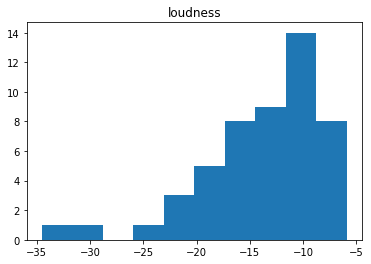

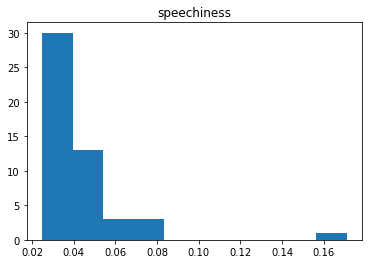

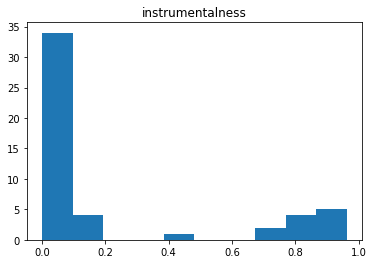

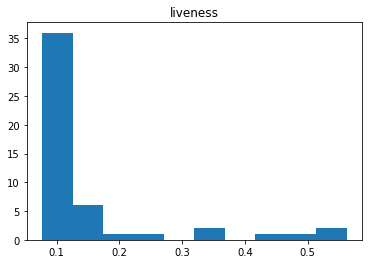

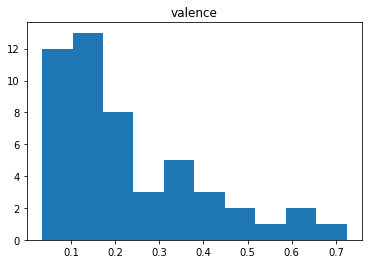

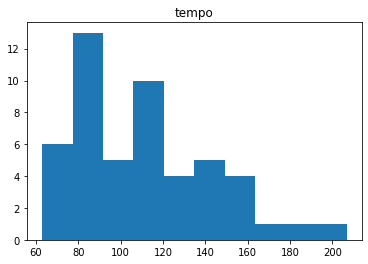

In [5]:
for col in numerical_cols:
    plt.hist(features_df[col])
    plt.title(col)
    plt.show()

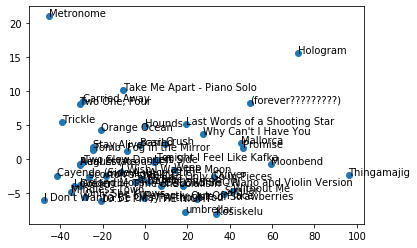

In [6]:
X = features_df[numerical_cols].values
pca = PCA(n_components=2)
coords = pca.fit_transform(X)
plt.scatter(coords[:,0], coords[:,1])

for i, txt in enumerate(features_df['track_name'].values):
    plt.annotate(txt, (coords[:,0][i], coords[:,1][i]))
    
plt.show()

In [7]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.9698104  0.03003702]
[230.96695902  40.6475944 ]


In [ ]:
# Radar chart uwu

for song in features_df:
    angles=np.linspace(0, 2*np.pi, len(numerical_cols), endpoint=False)
    print(song)
    import pdb
    pdb.set_trace()
    #song=np.concatenate((song,[song[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=sns.plt.figure()
    
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, song, 'o-', linewidth=2)
    ax.fill(angles, song, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(song["track_name"])
    ax.grid(True)

artist
> <ipython-input-10-73ce4f5e79a5>(9)<module>()
-> angles=np.concatenate((angles,[angles[0]]))


In [ ]:
features_df